# Ford Gobike Data 2018
## by Kriti Singh

## Investigation Overview

> As we have seen that our ford Gobike dataset has approx 85% subscribers and 15% customers, so in this presentation we will see the affect of customer type on weekday, start hour, start time etc.

## Dataset Overview

> This dataset is based on the bike rides which took place in the year 2018. Our dataset consists of many attributes such as duration, start time, end time, start station name, station id, start station longitude, latitute, user type, bike share for all trip etc.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# load in the dataset into a pandas dataframe
data_path = os.path.join(os.getcwd(), 'final_data', 'ford_bike_data_cleaned.csv')
df2 = pd.read_csv(data_path)
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_month,start_time_weekday,start_time_day,start_time_hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,January,Wed,31,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,January,Wed,31,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,January,Wed,31,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Market St at Franklin St,37.773793,-122.421239,321,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,January,Wed,31,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,January,Wed,31,19


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Duration Plot for each user type

> This is a visualization of the duration or time for each user type i.e the subscriber and the customer.

[(0.0, 5000.0)]

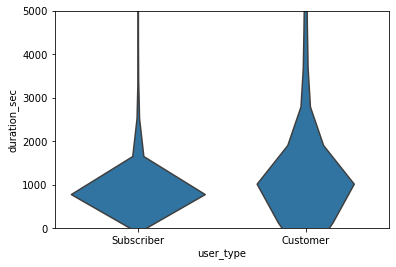

In [17]:
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df2, x = 'user_type', y = 'duration_sec', color = base_color,
              inner = None)
ax.set(ylim = (0,5000))

## Start hour vs start weekday for each user type

> This visualization represents a heat map depicting a common mapping for the start hour vs the start weekday for each user type.

Text(767.7272727272725, 0.5, 'Start time hour')

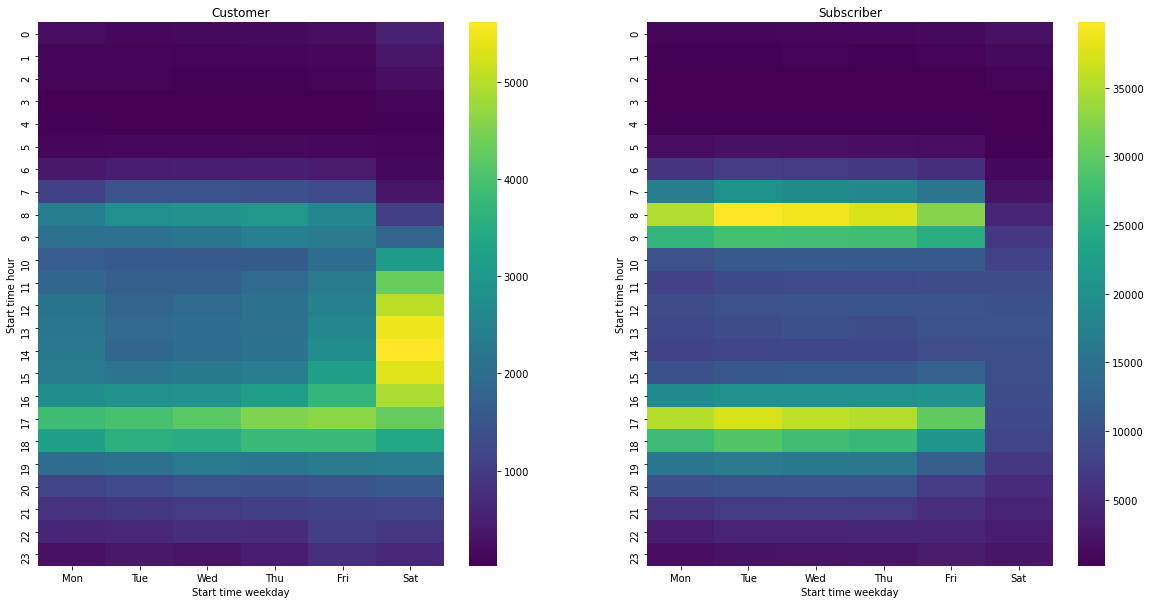

In [11]:
df2["start_time_weekday"] = pd.Categorical(df2["start_time_weekday"], categories=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat"], ordered = True)
#Heatmap for customers
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
customer_df = df2.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
customer_df = customer_df.pivot("start_time_hour","start_time_weekday","bike_id")
sb.heatmap(customer_df, cmap = "viridis")
plt.title("Customer")
plt.xlabel("Start time weekday")
plt.ylabel("Start time hour")
#Heatmap for subscribers
plt.subplot(1,2,2)
subscriber_df = df2.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
subscriber_df = subscriber_df.pivot("start_time_hour","start_time_weekday","bike_id")
sb.heatmap(subscriber_df, cmap = "viridis")
plt.title("Subscriber")
plt.xlabel("Start time weekday")
plt.ylabel("Start time hour")

## Count of bike share for each user type

This visualization depicts the count of bike share for each user type

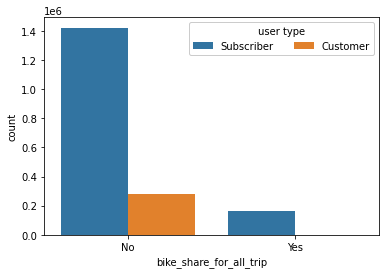

In [15]:
ax = sb.countplot(data = df2, x = 'bike_share_for_all_trip', hue = 'user_type')
ax.legend(ncol = 2,framealpha = 1, title = 'user type')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!